<a href="https://colab.research.google.com/github/hayatQ/EmailSpamDetection/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
import time

In [ ]:
# load dataset
spam = pd.read_csv("/content/spam.csv")
print(spam)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


**What is the number of the instances?** 5571 instances

In [ ]:
# info
print(spam.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


**What is the data type of your attributes? numerical or string?** object

In [ ]:
# head
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# tail
spam.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
# missing values
spam.isnull().sum(axis=0)

,0
Category,0
Message,0


**Are there any missing values?** No missing values

In [ ]:
spam["Category"].value_counts()

,count
Category,
ham,4825
spam,747


**Do you have categorical attributes? If there are categorical attributes, show their categories** Yes, we do it is ham and spam

<ipython-input-30-e49039067630>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['ham', 'spam'])


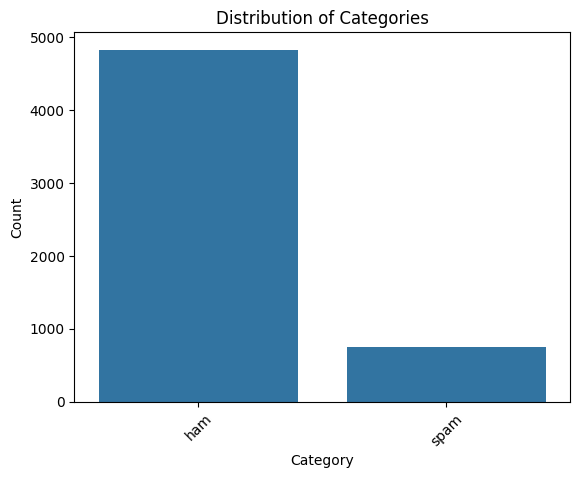

In [ ]:
# visualization using count plot

# Select the categorical column
categorical_column = spam['Category']

# Create a count plot
ax = sns.countplot(x=categorical_column)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')

# Rename the x-axis tick labels
ax.set_xticklabels(['ham', 'spam'])

plt.xticks(rotation=45)
plt.show()

In [ ]:
# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply preprocessing to the dataset
spam['processed'] = spam['Message'].apply(preprocess_text)

# one-hot encoding to convert nominal to numeric
one_hot_encoded = pd.get_dummies(spam['Category']).astype(int)
spam = pd.concat([spam, one_hot_encoded], axis=1)


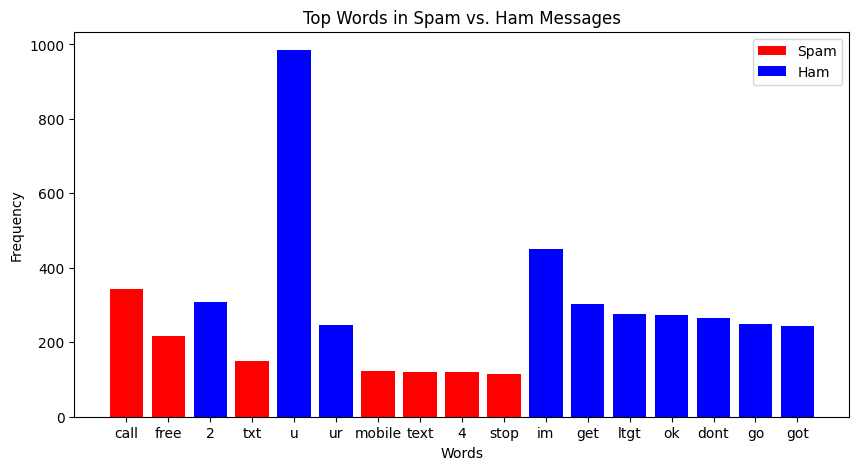

In [ ]:
# Word frequency function
def get_word_frequencies(corpus):
    all_words = [word for text in corpus for word in text.split()]  # Ensure splitting by spaces
    return nltk.FreqDist(all_words)

# Display top words
spam_words = get_word_frequencies(spam[spam['spam'] == 1]['processed'])
ham_words = get_word_frequencies(spam[spam['ham'] == 1]['processed'])
#print("Top 10 spam words:", spam_words.most_common(20))
#print("Top 10 ham words:", ham_words.most_common(20))

# Visualize the top 5 words in spam
plt.figure(figsize=(10, 5))
plt.bar(*zip(*spam_words.most_common(10)), color='red', label='Spam')
plt.bar(*zip(*ham_words.most_common(10)), color='blue', label='Ham')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words in Spam vs. Ham Messages')
plt.legend()
plt.show()

In [ ]:
# Features and Labels
X = spam['processed']
y = spam['Category']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:

# Create a pipeline for text classification
dt = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('dt', DecisionTreeClassifier())
])

# Training the pipeline
dt.fit(X_train, y_train)

# Predicting the Test set results
y_pred = dt.predict(X_test)

# Calculate cross-validation scores
scores = cross_val_score(dt, X, y, cv=10)

# Print the cross-validation scores
print("Cross-validation scores for Decision Tree Classifier:", scores)
print(" ")

avg_cv_DT = scores.mean()
# Print the average cross-validation score
print("Average cross-validation score for Decision Tree Classifier:", avg_cv_DT)
print(" ")
print(" ")
print(" ")
# Compute the confusion matrix
confusion_matrix_result  = confusion_matrix(y_test, y_pred)
# Print the confusion matrix
print(confusion_matrix_result)

# Calculate Recall
recall_ham_DT = recall_score(y_test, y_pred, pos_label='ham')  # Ensure that 'spam' is your positive class label
recall_spam_DT = recall_score(y_test, y_pred, pos_label='spam')
# Print Recall
print("Recall:", recall_ham_DT)
print("Recall:", recall_spam_DT)

Cross-validation scores for Decision Tree Classifier: [0.96953405 0.96415771 0.9551167  0.96588869 0.96768402 0.96229803
 0.96768402 0.96768402 0.9551167  0.97127469]
 
Average cross-validation score for Decision Tree Classifier: 0.9646438614441163
 
 
 
[[955  11]
 [ 18 131]]
Recall: 0.9886128364389234
Recall: 0.8791946308724832


In [ ]:
# Start the timer
start_time = time.time()

# Training the pipeline
dt.fit(X_train, y_train)

# Calculate the execution time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time for training DecisionTreeClassifier :", execution_time, "seconds")

Execution time for training DecisionTreeClassifier : 0.30600976943969727 seconds


In [ ]:
# Start the timer
start_time = time.time()

# Predicting the Test set results
y_pred = dt.predict(X_test)

# Calculate the execution time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time for predecting DecisionTreeClassifier :", execution_time, "seconds")

Execution time for predecting DecisionTreeClassifier : 0.018469810485839844 seconds


In [ ]:


# Create a pipeline for text classification
sgdc = Pipeline([
    ('vectorizer', CountVectorizer()), # CountVectorizer converts a collection of text documents to a matrix of token counts
    ('sgdc', SGDClassifier()) # SGDClassifier is a classifier based on decision trees
])

# Training the pipeline
sgdc.fit(X_train, y_train)

# Predicting the Test set results
y_pred = sgdc.predict(X_test)

# Calculate cross-validation scores
scores = cross_val_score(dt, X, y, cv=10)

# Print the cross-validation scores
print("Cross-validation scores for SGD Classifier:", scores)
print(" ")
avg_cv_SGD = scores.mean()
# Print the average cross-validation score
print("Average cross-validation score For SGD Classifier:", avg_cv_SGD)
print(" ")
print(" ")
print(" ")
confusion_matrix_result  = confusion_matrix(y_test, y_pred)
# Print the confusion matrix
print(confusion_matrix_result )

# Calculate Recall
recall_ham_sgd = recall_score(y_test, y_pred, pos_label='ham')  # Ensure that 'spam' is your positive class label
recall_spam_sgd = recall_score(y_test, y_pred, pos_label='spam')
# Print Recall
print("Recall:", recall_ham_sgd)
print("Recall:", recall_spam_sgd)

Cross-validation scores for SGD Classifier: [0.96774194 0.96415771 0.95870736 0.96947935 0.97307002 0.96409336
 0.96050269 0.96050269 0.95332136 0.97127469]
 
Average cross-validation score For SGD Classifier: 0.9642851167609378
 
 
 
[[961   5]
 [ 17 132]]
Recall: 0.994824016563147
Recall: 0.8859060402684564


In [ ]:
# Start the timer
start_time = time.time()


# Training the pipeline
sgdc.fit(X_train, y_train)

# Calculate the execution time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time for training SGDClassifier :", execution_time, "seconds")

Execution time for training SGDClassifier : 0.0742952823638916 seconds


In [ ]:
# Start the timer
start_time = time.time()


# Predicting the Test set results
y_pred = sgdc.predict(X_test)

# Calculate the execution time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time for predicting SGDClassifier :", execution_time, "seconds")

Execution time for predicting SGDClassifier : 0.017678022384643555 seconds


In [ ]:

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['DecisionTreeClassifier', 'SGDClassifier'],
    'Mean Cross-Validation Score': [avg_cv_DT, avg_cv_SGD],
    'Recall for Ham Class': [recall_ham_DT, recall_ham_sgd],
    'Recall for Spam Class': [recall_spam_DT, recall_spam_sgd],

})


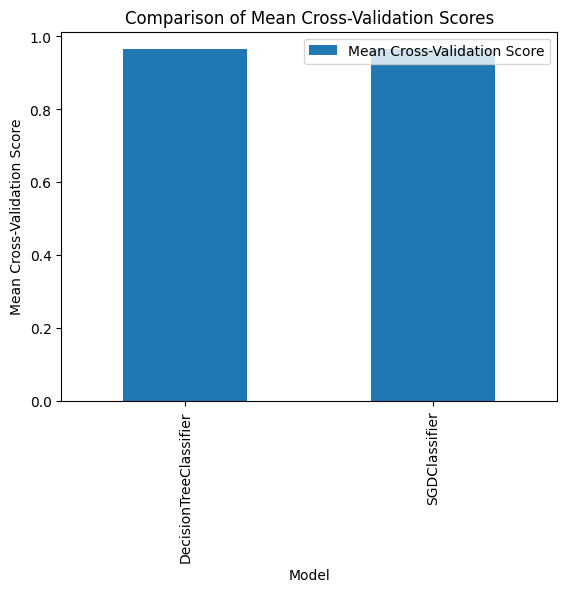

In [ ]:
# Create a bar chart to compare the mean cross-validation scores
results.plot.bar(x='Model', y='Mean Cross-Validation Score')
plt.xlabel('Model')
plt.ylabel('Mean Cross-Validation Score')
plt.title('Comparison of Mean Cross-Validation Scores')
plt.show()


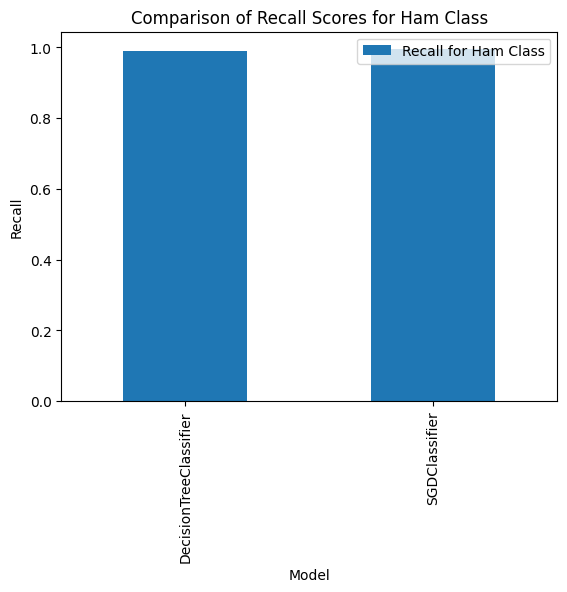

In [ ]:
# Create a bar chart to compare the recall scores
results.plot.bar(x='Model', y='Recall for Ham Class')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Comparison of Recall Scores for Ham Class')
plt.show()

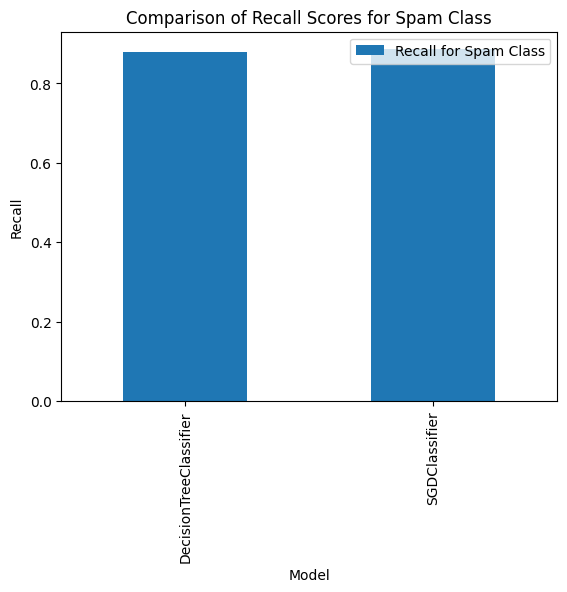

In [ ]:
# Create a bar chart to compare the recall scores
results.plot.bar(x='Model', y='Recall for Spam Class')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Comparison of Recall Scores for Spam Class')
plt.show()